<a href="https://colab.research.google.com/github/Gaurav-phatkare/Classification-Models-Tensorflow/blob/main/Multilabel_classification_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Jul 31 16:03:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os

In [3]:
!pip install kaggle

In [4]:
!mkdir ~/.kaggle

In [7]:
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d alessiocorrado99/animals10

 96% 561M/586M [00:02<00:00, 288MB/s]
100% 586M/586M [00:02<00:00, 220MB/s]


In [ ]:
!unzip /content/animals10.zip

In [11]:
for dirpath, dirnames, filenames in os.walk("/content/raw-img"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 10 directories and 0 images in '/content/raw-img'.
There are 0 directories and 3098 images in '/content/raw-img/gallina'.
There are 0 directories and 1820 images in '/content/raw-img/pecora'.
There are 0 directories and 2623 images in '/content/raw-img/cavallo'.
There are 0 directories and 2112 images in '/content/raw-img/farfalla'.
There are 0 directories and 1668 images in '/content/raw-img/gatto'.
There are 0 directories and 4821 images in '/content/raw-img/ragno'.
There are 0 directories and 1862 images in '/content/raw-img/scoiattolo'.
There are 0 directories and 1866 images in '/content/raw-img/mucca'.
There are 0 directories and 4863 images in '/content/raw-img/cane'.
There are 0 directories and 1446 images in '/content/raw-img/elefante'.


In [12]:
!mkdir Animal10_dataset

In [13]:
cd Animal10_dataset

/content/Animal10_dataset


In [14]:
pwd

'/content/Animal10_dataset'

In [15]:
!mkdir train
!mkdir test

In [16]:
cd train

/content/Animal10_dataset/train


In [17]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}


In [18]:
!mkdir cane-dog
!mkdir cavallo-horse
!mkdir elefante-elephant
!mkdir farfalla-butterfly
!mkdir gallina-chicken
!mkdir gatto-cat
!mkdir mucca-cow
!mkdir pecora-sheep
!mkdir scoiattolo-squirrel
!mkdir ragno-spider

In [19]:
cd /content/Animal10_dataset/test

/content/Animal10_dataset/test


In [20]:
!mkdir cane-dog
!mkdir cavallo-horse
!mkdir elefante-elephant
!mkdir farfalla-butterfly
!mkdir gallina-chicken
!mkdir gatto-cat
!mkdir mucca-cow
!mkdir pecora-sheep
!mkdir scoiattolo-squirrel
!mkdir ragno-spider

In [21]:
import os
import random
import shutil

def split_data(source_folder, train_folder, test_folder, train_ratio = 0.8):

    image_files = [file for file in os.listdir(source_folder) if file.endswith(('.jpg','.jpeg','.png'))]

    num_train = int(len(image_files) * train_ratio)
    num_test = len(image_files) - num_train

    random.shuffle(image_files)


    for file in image_files[:num_train]:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(train_folder, file)
        shutil.copyfile(source_path, destination_path)

    for file in image_files[num_train:]:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(test_folder, file)
        shutil.copyfile(source_path, destination_path)

In [22]:
source_folder_cane = "/content/raw-img/cane"
source_folder_cavallo = "/content/raw-img/cavallo"
source_folder_elefante = "/content/raw-img/elefante"
source_folder_farfalla = '/content/raw-img/farfalla'
source_folder_gallina = "/content/raw-img/gallina"
source_folder_gatto = "/content/raw-img/gatto"
source_folder_mucca = "/content/raw-img/mucca"
source_folder_pecora = "/content/raw-img/pecora"
source_folder_scoiattolo = "/content/raw-img/scoiattolo"
source_folder_ragno = "/content/raw-img/ragno"

In [23]:
split_data(source_folder_cane,"/content/Animal10_dataset/train/cane-dog","/content/Animal10_dataset/test/cane-dog")
split_data(source_folder_cavallo,"/content/Animal10_dataset/train/cavallo-horse","/content/Animal10_dataset/test/cavallo-horse")
split_data(source_folder_elefante,"/content/Animal10_dataset/train/elefante-elephant","/content/Animal10_dataset/test/cane-dog")
split_data(source_folder_farfalla,"/content/Animal10_dataset/train/farfalla-butterfly","/content/Animal10_dataset/test/farfalla-butterfly")
split_data("/content/raw-img/gallina","/content/Animal10_dataset/train/gallina-chicken","/content/Animal10_dataset/test/gallina-chicken")
split_data(source_folder_gatto,"/content/Animal10_dataset/train/gatto-cat","/content/Animal10_dataset/test/gatto-cat")
split_data(source_folder_mucca,"/content/Animal10_dataset/train/mucca-cow","/content/Animal10_dataset/test/mucca-cow")
split_data(source_folder_pecora,"/content/Animal10_dataset/train/pecora-sheep","/content/Animal10_dataset/test/pecora-sheep")
split_data(source_folder_scoiattolo,"/content/Animal10_dataset/train/scoiattolo-squirrel","/content/Animal10_dataset/test/scoiattolo-squirrel")
split_data(source_folder_ragno,"/content/Animal10_dataset/train/ragno-spider","/content/Animal10_dataset/test/ragno-spider")

In [24]:
for dirpath, dirnames, filenames in os.walk("/content/Animal10_dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/Animal10_dataset'.
There are 10 directories and 0 images in '/content/Animal10_dataset/test'.
There are 0 directories and 965 images in '/content/Animal10_dataset/test/ragno-spider'.
There are 0 directories and 374 images in '/content/Animal10_dataset/test/mucca-cow'.
There are 0 directories and 373 images in '/content/Animal10_dataset/test/scoiattolo-squirrel'.
There are 0 directories and 334 images in '/content/Animal10_dataset/test/gatto-cat'.
There are 0 directories and 1263 images in '/content/Animal10_dataset/test/cane-dog'.
There are 0 directories and 620 images in '/content/Animal10_dataset/test/gallina-chicken'.
There are 0 directories and 525 images in '/content/Animal10_dataset/test/cavallo-horse'.
There are 0 directories and 423 images in '/content/Animal10_dataset/test/farfalla-butterfly'.
There are 0 directories and 0 images in '/content/Animal10_dataset/test/elefante-elephant'.
There are 0 directories and 364 images in '/

In [25]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/Animal10_dataset/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cane-dog' 'cavallo-horse' 'elefante-elephant' 'farfalla-butterfly'
 'gallina-chicken' 'gatto-cat' 'mucca-cow' 'pecora-sheep' 'ragno-spider'
 'scoiattolo-squirrel']


In [26]:
# view random images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder),1)

    image = mpimg.imread(target_folder + '/' + random_image[0])

    plt.imshow(image)
    plt.title(target_class)
    plt.axis("off");

    print(f'Image shape:{image.shape}')

    return image

Image shape:(211, 300, 3)


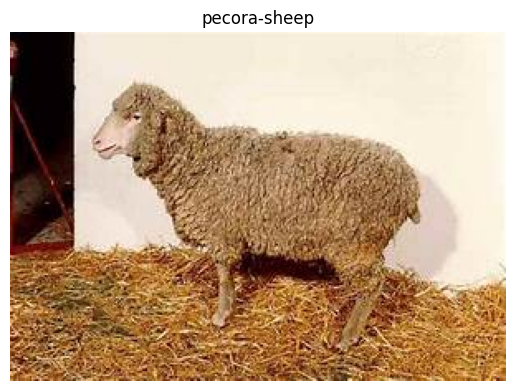

In [39]:
img = view_random_image(target_dir = '/content/Animal10_dataset/train/',
                        target_class = "pecora-sheep")


In [40]:
# define training and testing directory paths

train_dir = '/content/Animal10_dataset/train'
test_dir = '/content/Animal10_dataset/test'

In [42]:

# rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                          rotation_range = 20,
                                          shear_range = 0.2,
                                          zoom_range = 0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          horizontal_flip = True)

# without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)


# test instances without data augmentation
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [60]:
# Augment the data

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = 'categorical',
                                                                  shuffle = True)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical',
                                               shuffle = True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 20938 images belonging to 10 classes.
Found 20938 images belonging to 10 classes.
Found 5241 images belonging to 10 classes.


(-0.5, 223.5, 223.5, -0.5)

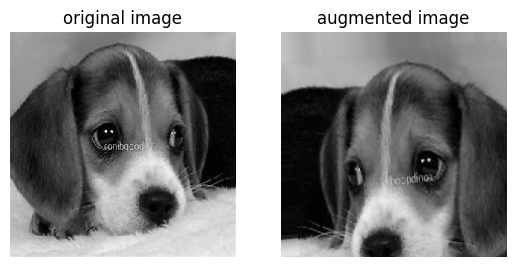

In [59]:

# visualize the data

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


# random_number = random.randint(0, 32)

plt.figure()
plt.subplot(1,2,1)

plt.imshow(images[12])
plt.title('original image')
plt.axis(False)



plt.subplot(1,2,2)
plt.imshow(augmented_images[12])
plt.title('augmented image')
plt.axis(False)

# Model 0: baseline model with Data Augmentation

In [61]:
train_data_augmented.num_classes

10

In [62]:
# build a model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,
                           3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# compile a model
model_0.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [63]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0

In [64]:
history_0 = model_0.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
655/655 [==============================] - 267s 392ms/step - loss: 2.0139 - accuracy: 0.2906 - val_loss: 1.7988 - val_accuracy: 0.3703
Epoch 2/5
655/655 [==============================] - 256s 391ms/step - loss: 1.7597 - accuracy: 0.3849 - val_loss: 1.6714 - val_accuracy: 0.4221
Epoch 3/5
655/655 [==============================] - 253s 387ms/step - loss: 1.6597 - accuracy: 0.4236 - val_loss: 1.5933 - val_accuracy: 0.4658
Epoch 4/5
655/655 [==============================] - 254s 388ms/step - loss: 1.6102 - accuracy: 0.4443 - val_loss: 1.5552 - val_accuracy: 0.4680
Epoch 5/5
655/655 [==============================] - 254s 388ms/step - loss: 1.5658 - accuracy: 0.4628 - val_loss: 1.5672 - val_accuracy: 0.4780


In [65]:
# helper function
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))




  plt.figure(figsize = (8,4))
  plt.subplot(1,2,1)

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1,2,2)


  # Plot accuracy
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

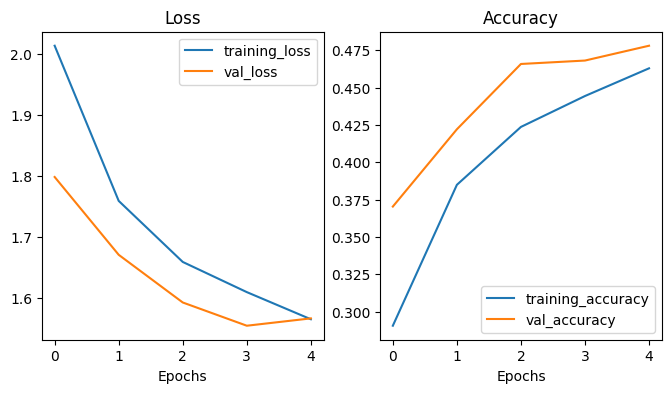

In [66]:
plot_loss_curves(history_0)

# model 1: hyperparameter tuning

In [96]:
# build a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,
                           3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),


    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),

    # tf.keras.layers.Dense(100, activation = 'relu'),
    # tf.keras.layers.Dense(100, activation = 'relu'),
    # tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# compile a model
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [97]:
model_1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_79 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_81 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 conv2d_82 (Conv2D)          (None, 104, 104, 10)      910       
                                                     

In [98]:
history_1 = model_1.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
655/655 [==============================] - 271s 409ms/step - loss: 2.0423 - accuracy: 0.2640 - val_loss: 1.9081 - val_accuracy: 0.3158
Epoch 2/5
655/655 [==============================] - 266s 406ms/step - loss: 1.8260 - accuracy: 0.3569 - val_loss: 1.6978 - val_accuracy: 0.3808
Epoch 3/5
655/655 [==============================] - 260s 398ms/step - loss: 1.7048 - accuracy: 0.3950 - val_loss: 1.5383 - val_accuracy: 0.4457
Epoch 4/5
655/655 [==============================] - 260s 397ms/step - loss: 1.6218 - accuracy: 0.4273 - val_loss: 1.4298 - val_accuracy: 0.4885
Epoch 5/5
655/655 [==============================] - 260s 397ms/step - loss: 1.5283 - accuracy: 0.4651 - val_loss: 1.4378 - val_accuracy: 0.5049


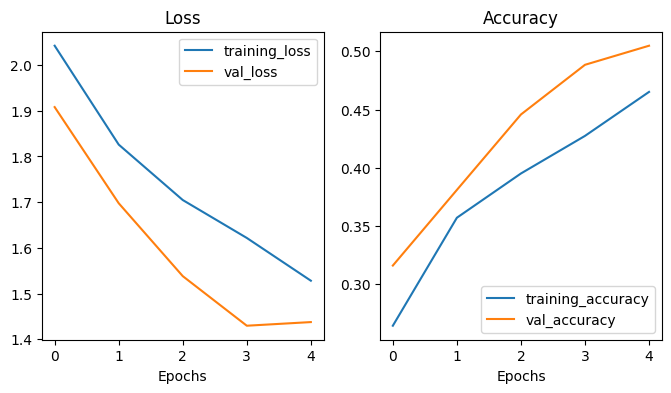

In [99]:
plot_loss_curves(history_1)

from now we will use two models from tensorflow Hub:
1. ResNetV2 - a state of the art computer vision model architecture from 2016.
https://arxiv.org/abs/1603.05027
2. EfficientNet - a state of the art computer vision architecture from 2019.
https://arxiv.org/abs/1603.05027

# model 2: Resnet V2

In [100]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [101]:
# resnet 50 v2 url
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

In [116]:
def create_model(model_url, num_classes = 10):

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = True,
                                           name = 'feature_extraction_layer',
                                           input_shape = (224,224,3))

  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation ='softmax',name = 'output_layer')

  ])

  return model

In [117]:
resnet_model = create_model(resnet_url)

# compile a model
resnet_model.compile(loss = 'categorical_crossentropy',
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

In [118]:
resnet_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 23,539,850
Non-trainable params: 45,440
_________________________________________________________________


In [119]:
# fit the model
resnet_history = resnet_model.fit(train_data_augmented,
                                  epochs = 5,
                                  steps_per_epoch=len(train_data),
                                  validation_steps=len(test_data),
                                  validation_data = test_data)

Epoch 1/5
655/655 [==============================] - 365s 509ms/step - loss: 1.4045 - accuracy: 0.6495 - val_loss: 1.9096 - val_accuracy: 0.6031
Epoch 2/5
655/655 [==============================] - 339s 517ms/step - loss: 1.1030 - accuracy: 0.7679 - val_loss: 1.7726 - val_accuracy: 0.6856
Epoch 3/5
655/655 [==============================] - 422s 644ms/step - loss: 1.0600 - accuracy: 0.8021 - val_loss: 2.2959 - val_accuracy: 0.5115
Epoch 4/5
655/655 [==============================] - 354s 540ms/step - loss: 1.0311 - accuracy: 0.8203 - val_loss: 1.5545 - val_accuracy: 0.7649
Epoch 5/5
655/655 [==============================] - 341s 520ms/step - loss: 1.0336 - accuracy: 0.8296 - val_loss: 1.3793 - val_accuracy: 0.7302


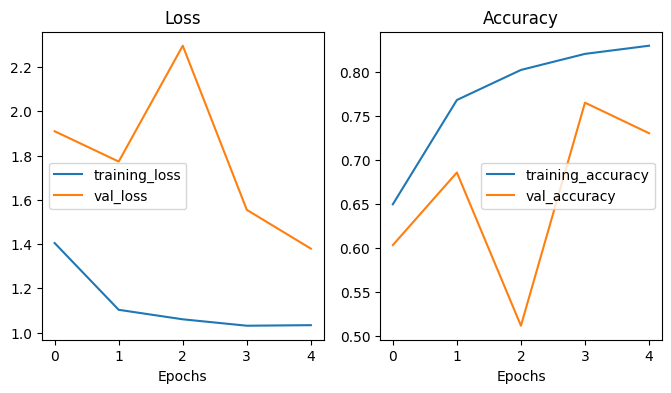

In [120]:
plot_loss_curves(resnet_history)

# model 3: EfficientNet model

In [121]:
efficientNet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [122]:
# create the model

efficientNet_model = create_model(model_url = efficientNet_url, num_classes = 10)

efficientNet_model.compile(loss = 'categorical_crossentropy',
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ['accuracy'])

efficientNet_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 4,020,358
Non-trainable params: 42,016
_________________________________________________________________


In [ ]:
# fit the model

efficient_history = efficientNet_model.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
